# Black Friday Sales Prediction

**importing Libraries** and **Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
import warnings
warnings.filterwarnings('ignore')

In [2]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


## Descriptive data analysis

In [3]:
train.shape

(550068, 12)

In [4]:
test.shape

(233599, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
train.isnull().sum()/train.shape[0]

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

In [8]:
#distribution of data between age group
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [9]:
#distribution of data between age group (in percentage)
round((train['Age'].value_counts(normalize = True).mul(100)), 2)

26-35    39.92
36-45    20.00
18-25    18.12
46-50     8.31
51-55     7.00
55+       3.91
0-17      2.75
Name: Age, dtype: float64

In [10]:
#distribution of data based on years stayed
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2)

1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: Stay_In_Current_City_Years, dtype: float64

<h1>Observation:</h1>
<ul>
    <li>High Number of null values are observed in Product category 3 (69%).... Hence this feature must be dropped</li>
    <li>stay in current City and Age has some values that are strings (due to presence of '+')</li> 
</ul>    

## Exploratory Data Analysis

<div style="background-color:lightblue;color:blue;font-weight:900"><p>Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as</p> 
   <ul>   
     <li>to discover patterns,</li>
     <li>to spot anomalies,</li>
     <li>to test hypothesis,and</li>  
     <li>to check assumptions with the help of summary statistics and graphical representations.</li>
    </ul>    
</div>

## Comparing Single Variable With Counts

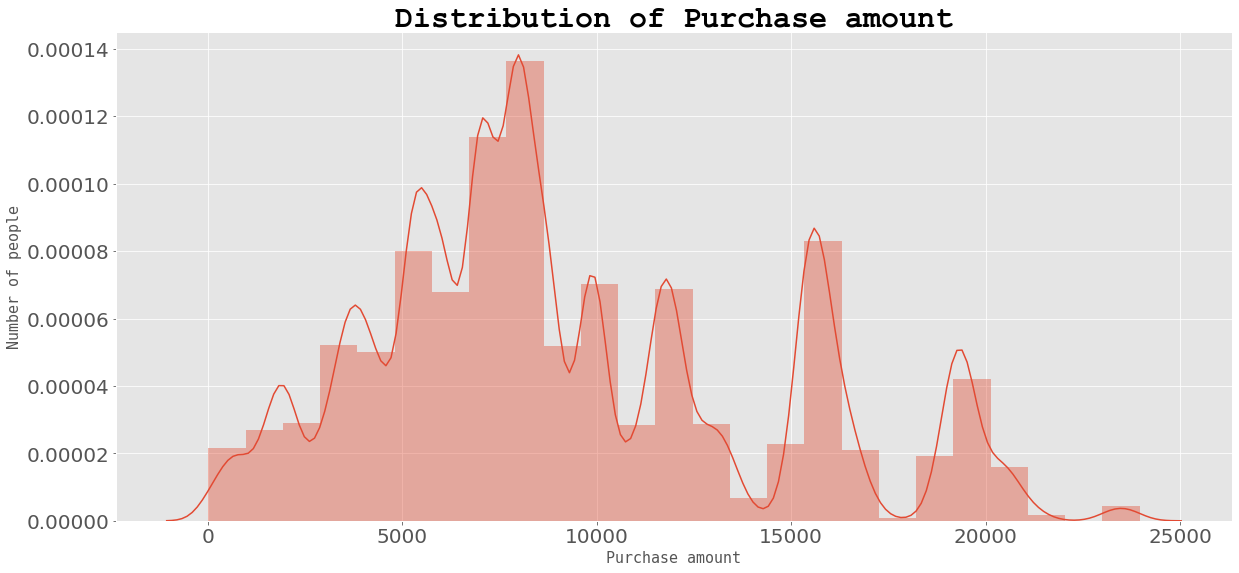

In [11]:
plt.style.use('ggplot')
plt.figure(figsize = (20,9))
sns.distplot(train['Purchase'], bins = 25)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Courier New', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.show()

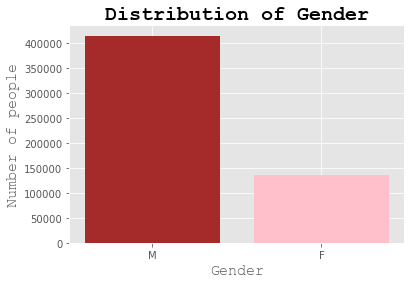

In [12]:
gender=train['Gender'].value_counts()
bar_color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple']
plt.bar(gender.index,gender.values,color=bar_color)
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Courier New','fontsize' : 20,'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Courier New', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Courier New', 'fontsize' : 15})
plt.show()

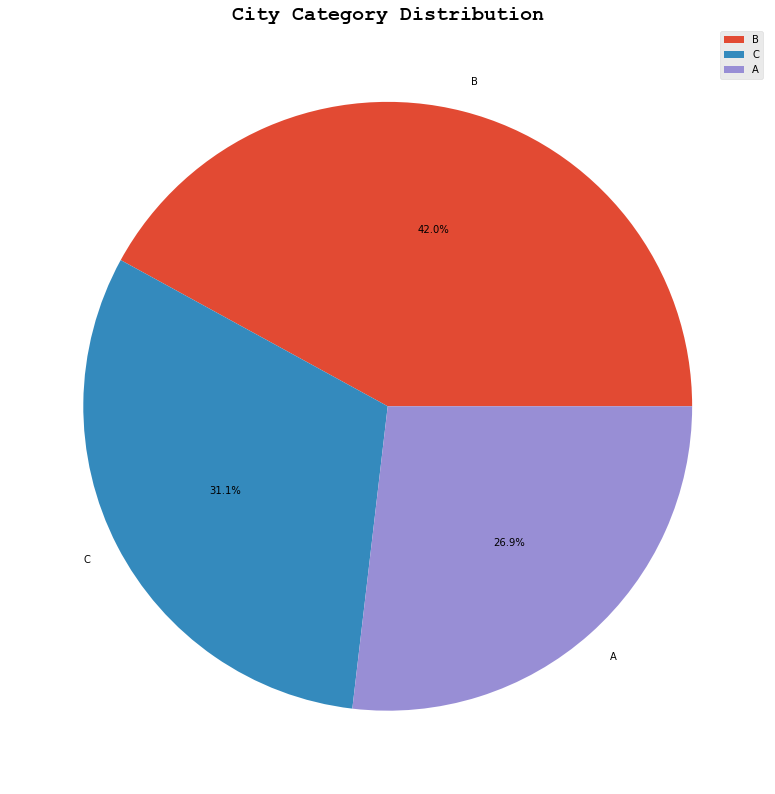

In [13]:
city_category=train['City_Category'].value_counts()
plt.figure(figsize=(20,14))
plt.title("City Category Distribution",fontdict={'fontname':'Courier New','fontsize':20,'fontweight':'bold'})
plt.pie(city_category.values,labels=city_category.index,autopct="%1.1f%%")
plt.legend()

plt.show()


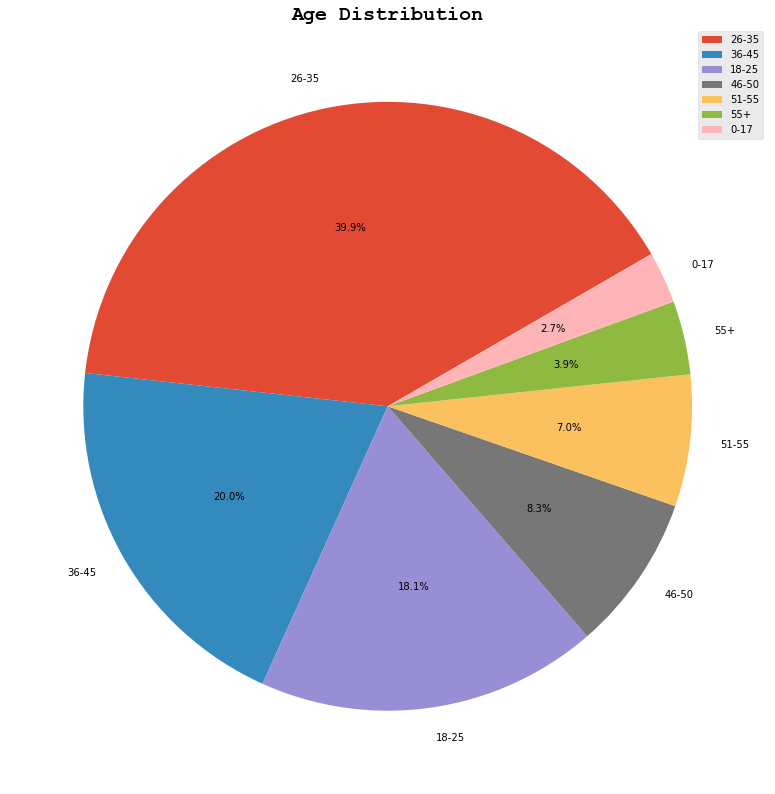

In [14]:
age=train['Age'].value_counts()
age
plt.figure(figsize=(20,14))
plt.pie(age.values,labels=age.index,startangle=30,autopct='%1.1f%%')
plt.title("Age Distribution",fontdict={'fontname':'Courier New','fontsize':20,'fontweight':'bold'})
plt.legend()
plt.show()

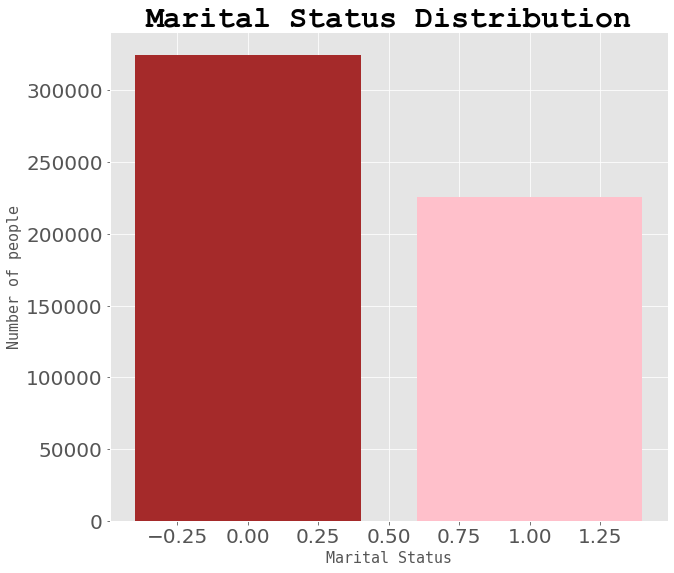

In [15]:
m_s=train['Marital_Status'].value_counts()
plt.figure(figsize = (10, 9))
plt.bar(m_s.index,m_s.values,color=bar_color)
plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Courier New', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.show()

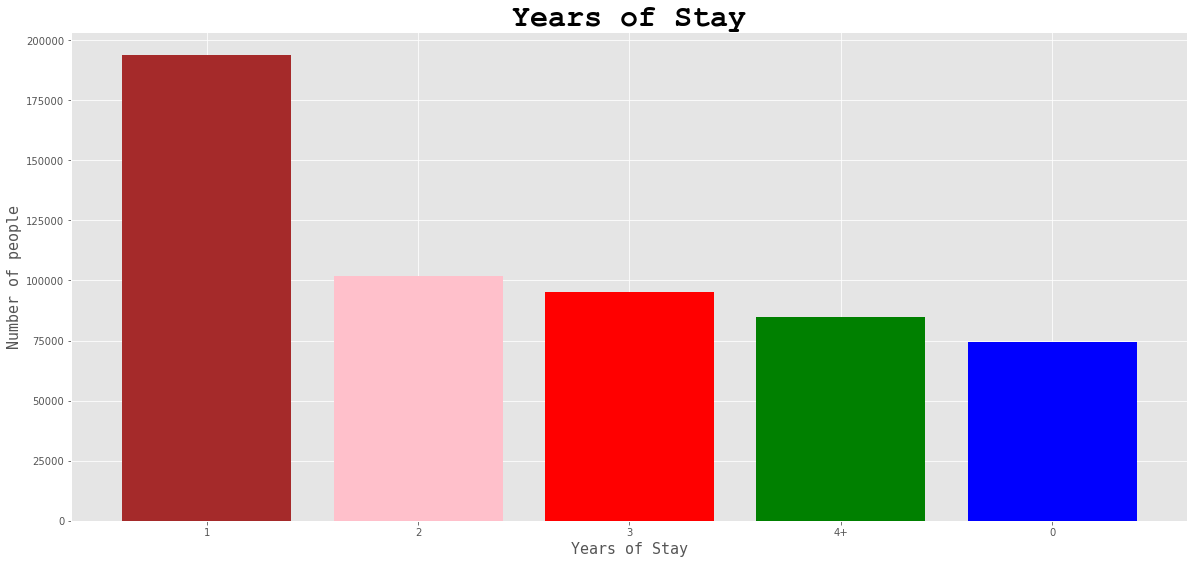

In [16]:
stay=train['Stay_In_Current_City_Years'].value_counts()
plt.figure(figsize=(20,9))
plt.bar(stay.index,stay.values,color=bar_color)
plt.title('Years of Stay', fontdict = {'fontname' : 'Courier New', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Years of Stay', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})

plt.show()

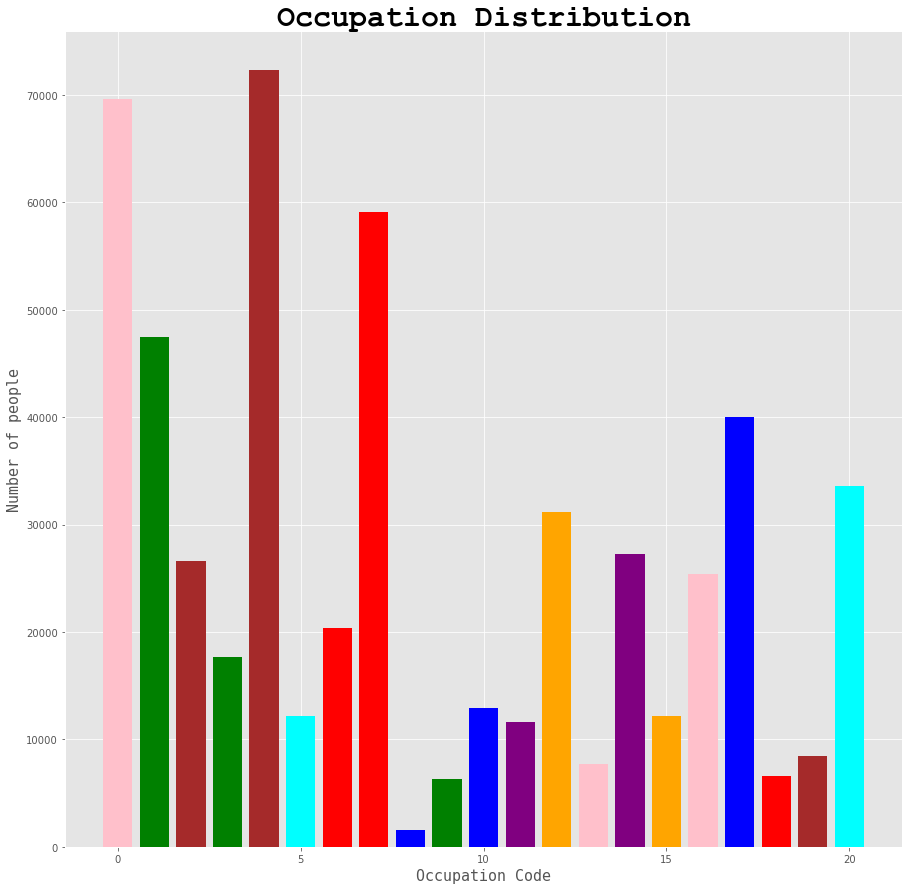

In [17]:
occ=train['Occupation'].value_counts()
plt.figure(figsize = (15, 15))
plt.bar(occ.index,occ.values,color=bar_color)
plt.title('Occupation Distribution', fontdict = {'fontname' : 'Courier New', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Occupation Code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})

plt.show()

<div style="color:blue;"><h1 style="font-style:sans-serif;">Comparing 2 variables</h1>

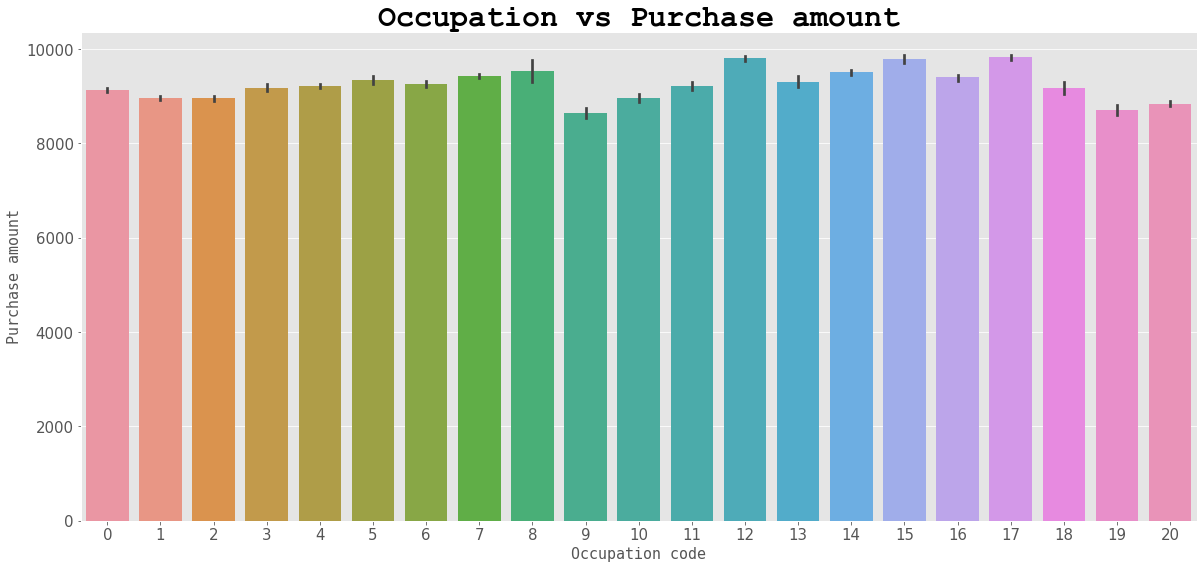

In [18]:
plt.figure(figsize=(20,9))
sns.barplot(train['Occupation'], train['Purchase'])
plt.title('Occupation vs Purchase amount', fontdict = {'fontname' : 'Courier New', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

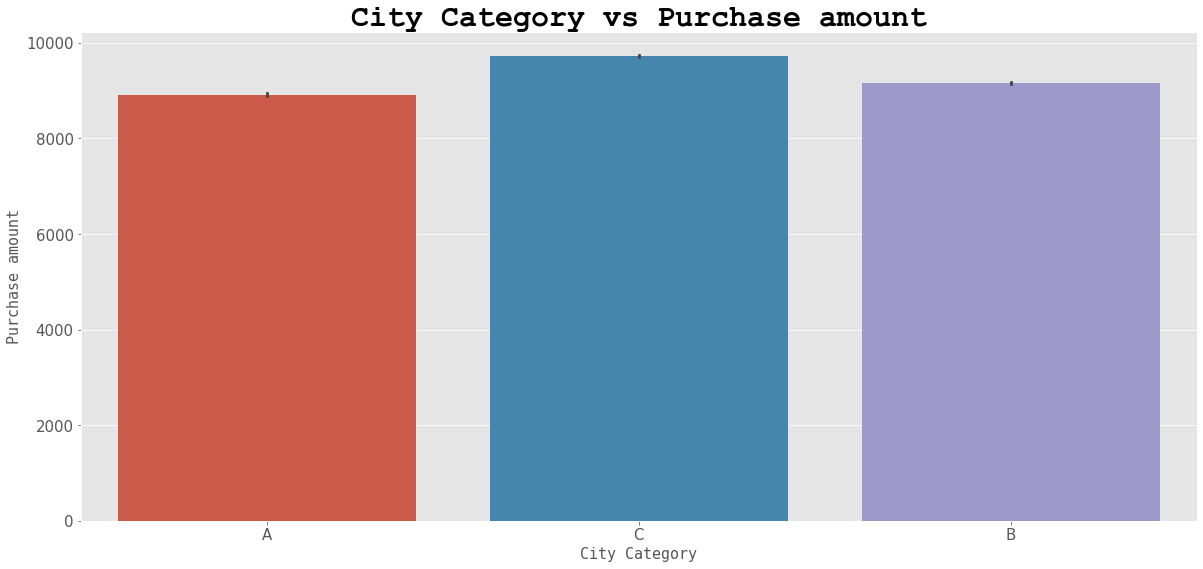

In [19]:
plt.figure(figsize=(20,9))
sns.barplot(train['City_Category'], train['Purchase'])
plt.title('City Category vs Purchase amount', fontdict = {'fontname' : 'Courier New', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

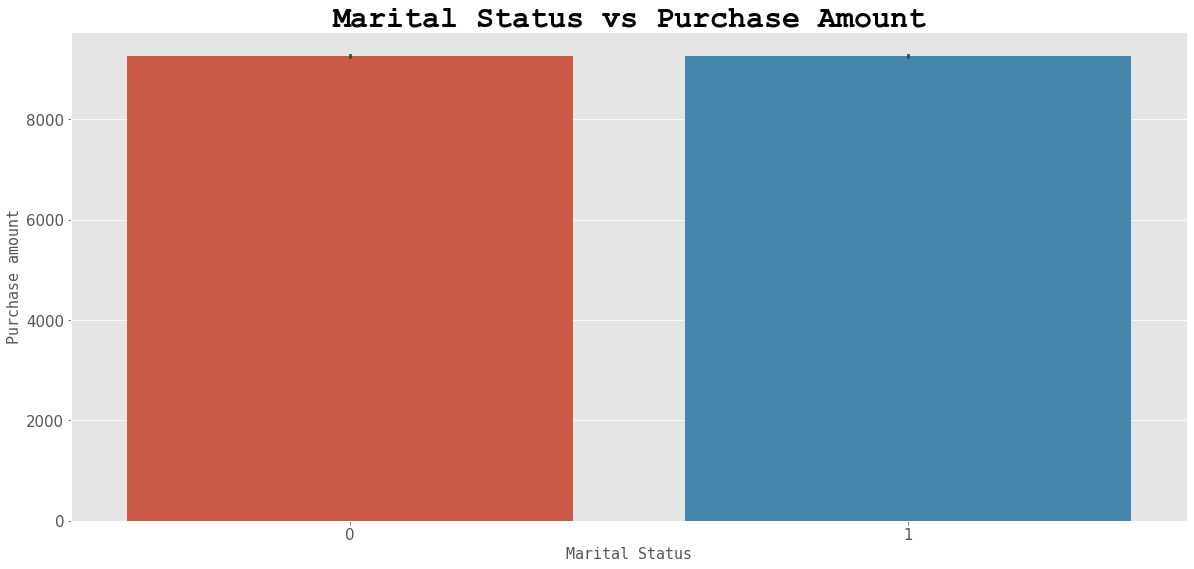

In [20]:
plt.figure(figsize=(20,9))
sns.barplot(train['Marital_Status'], train['Purchase'])
plt.title('Marital Status vs Purchase Amount', fontdict = {'fontname' : 'Courier New', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

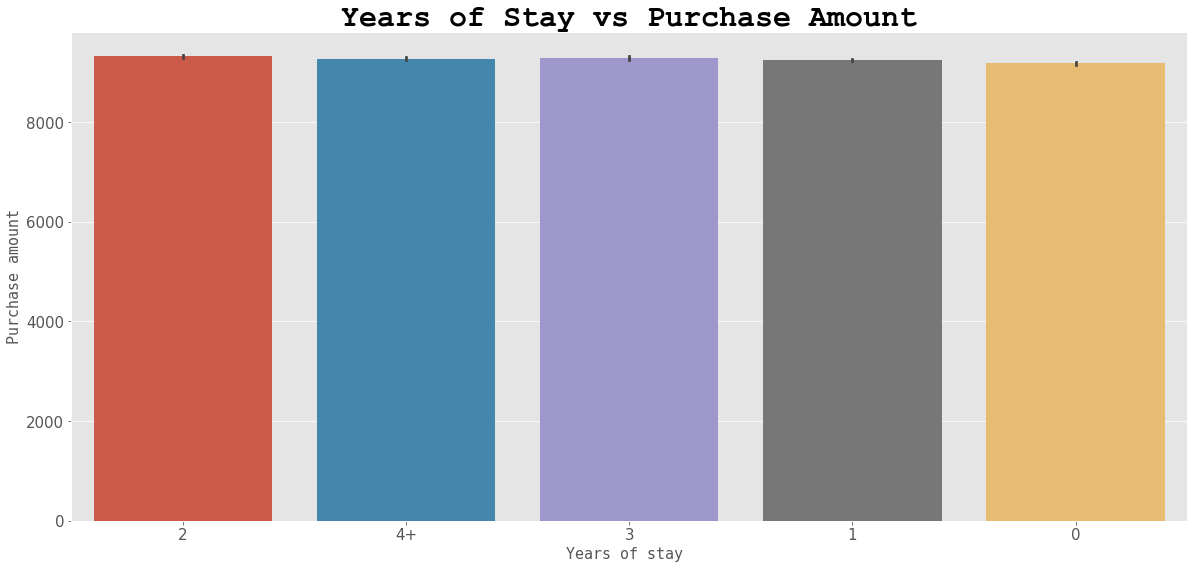

In [21]:
plt.figure(figsize=(20,9))
sns.barplot(train['Stay_In_Current_City_Years'], train['Purchase'])
plt.title('Years of Stay vs Purchase Amount', fontdict = {'fontname' : 'Courier New', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Years of stay ', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

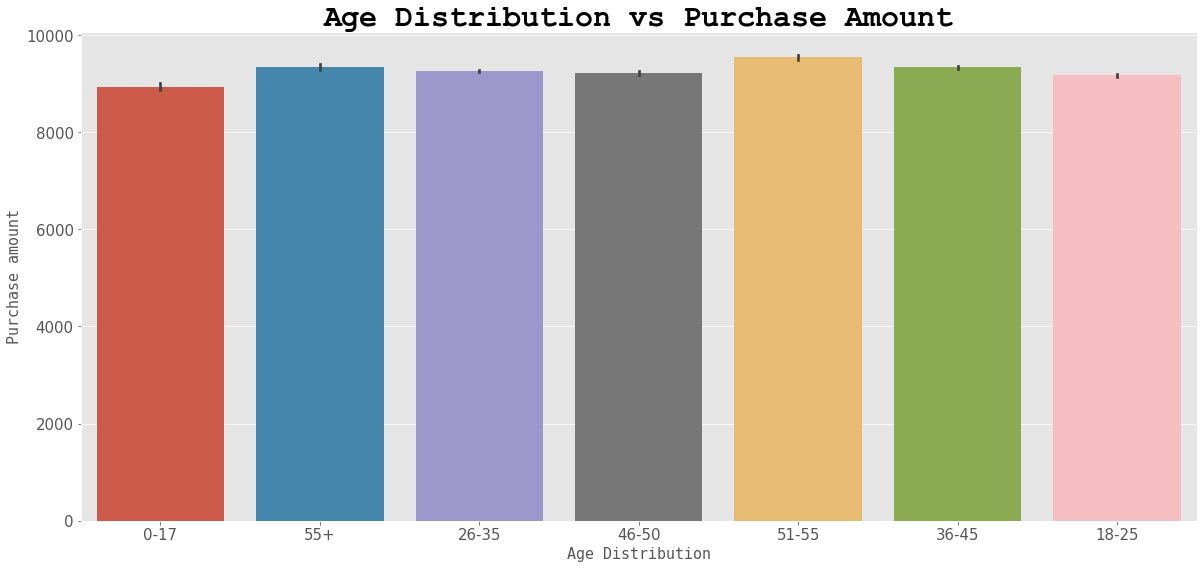

In [22]:
plt.figure(figsize=(20,9))
sns.barplot(train['Age'], train['Purchase'])
plt.title('Age Distribution vs Purchase Amount', fontdict = {'fontname' : 'Courier New', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Age Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

<h1>Correlation Heatmap</h1>
<p>Correlation heatmap is graphical representation of correlation matrix representing correlation between different variables.</p>

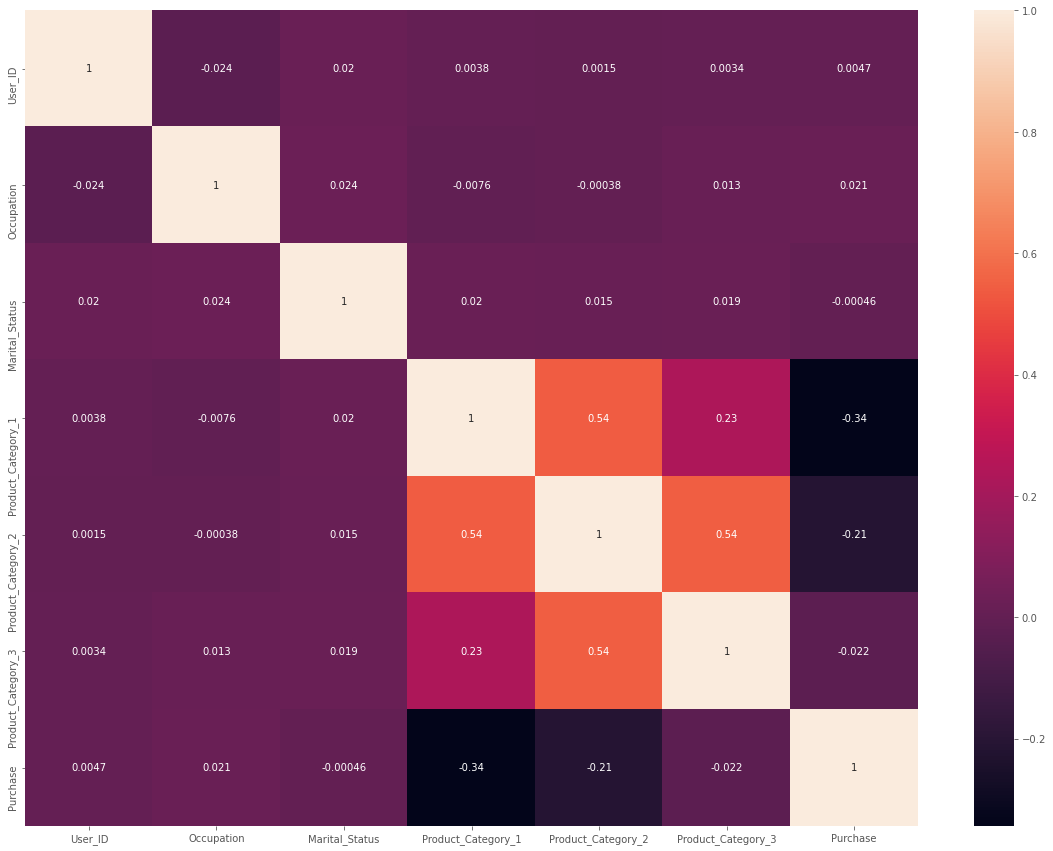

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(), annot = True)
plt.show()

<h1>Observation :</h1>
<ul>
    <li>Significant negative correlation for <span style="color:blue">Product_category_1</span> and <span style="color:blue">Product_category_2 </span> with Purchase</li>
    <li>In all distribution plot all categories have purchase above 8000</li>
    <li>Males have contributed more to  purchasing power than females</li>
    <li>Age group 26-35 have purchased more than other age groups in Black friday</li> 
    <li>City A have significant purchase power than other two cities</li>


</ul>


## Data Preprocessing

In [24]:
#merging train and test data----->adding a column source to split them after preprocessing
train['source']='train'
test['source']='test'
merged=pd.concat([train,test])
merged.shape

(783667, 13)

## Dropping Unnecessary Features

In [25]:
merged.drop('Product_Category_3',axis=1,inplace=True)

In [26]:
merged.drop('User_ID',axis=1,inplace=True)
merged.drop('Product_ID',axis=1,inplace=True)

## Replacing presence of '+' in features

In [27]:
merged['Age'] = merged['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [28]:
merged['Stay_In_Current_City_Years'] = merged['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))

## Fixing null values

In [29]:
merged['Product_Category_2'].fillna(merged['Product_Category_2'].median(), inplace = True)

## Converting string values to integers

In [30]:
merged['Stay_In_Current_City_Years'] = merged['Stay_In_Current_City_Years'].astype('int')

## Feature Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
merged['Gender']=encoder.fit_transform(merged['Gender'])
merged['Age']=encoder.fit_transform(merged['Age'])
merged['City_Category']=encoder.fit_transform(merged['City_Category'])

## Splitting Data

In [32]:
train = merged.loc[merged['source'] == 'train']
test = merged.loc[merged['source'] == 'test']
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

In [33]:
x_train=train.drop('Purchase', axis = 1)
y_train=train['Purchase']

## Selecting Features based on Importance

In [34]:
from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()
selector.fit(x_train, y_train)

ExtraTreesRegressor()

In [35]:
for index, val in enumerate(selector.feature_importances_):
    print(index, round((val * 100), 2))

0 0.48
1 2.08
2 4.92
3 0.74
4 2.56
5 0.61
6 80.39
7 8.23


In [36]:
x_train.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2'],
      dtype='object')

<div style="border:2px solid black ;height:100px;text-align:center;position:relative;"> 
 Since feature importance for Gender,City_Category,Marital_Status features are less than 1 they are excluded from the data set
 </div>

In [37]:
x_train.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

In [38]:
x_train

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
0,0,10,2,3,9.0
1,0,10,2,1,6.0
2,0,10,2,12,9.0
3,0,10,2,12,14.0
4,6,16,4,8,9.0
...,...,...,...,...,...
550063,5,13,1,20,9.0
550064,2,1,3,20,9.0
550065,2,15,4,20,9.0
550066,6,1,2,20,9.0


<h2>Feature Scaling</h2>

In [40]:
from sklearn.preprocessing import StandardScaler
func = StandardScaler()
for col in x_train.columns:
  x_train[col] = func.fit_transform(x_train[col].values.reshape(-1, 1))

## Train test split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
X_train

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
178247,5,7,3,1,15.0
196647,1,12,4,5,9.0
418590,2,5,1,8,14.0
408727,1,4,2,8,9.0
216416,1,4,1,1,8.0
...,...,...,...,...,...
110268,4,17,2,5,9.0
259178,2,14,2,5,9.0
365838,1,1,1,5,9.0
131932,1,4,2,8,14.0


In [41]:
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

X_train (440054, 5)
Y_train (440054,)
X_test (110014, 5)
Y_test (110014,)


# Data Modelling

## Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
algo1 = LinearRegression()
algo1.fit(X_train,Y_train)
y_algo1_pred=algo1.predict(X_test)

## Ridge Regression

In [46]:
from sklearn.linear_model import Ridge
algo2=Ridge(alpha=0.01)
algo2.fit(X_train, Y_train)
y_algo2_pred=algo2.predict(X_test)

## Lasso Regression

In [48]:
from sklearn.linear_model import Lasso
algo3=Lasso(alpha=0.01)
algo3.fit(X_train,Y_train)
y_algo3_pred=algo3.predict(X_test)

## Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor
algo4= DecisionTreeRegressor()
algo4.fit(X_train,Y_train)
y_algo4_pred=algo3.predict(X_test)

## Random Forest Regression

In [50]:
from sklearn.ensemble import RandomForestRegressor
algo5 = RandomForestRegressor()
algo5.fit(X_train,Y_train)
y_algo5_pred=algo5.predict(X_test)

# Model Evaluation

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [52]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_algo1_pred)))
print("R2 score:", r2_score(Y_test, y_algo1_pred))

Linear Regression: 
RMSE: 4699.473872577099
R2 score: 0.12103412745405762


In [53]:
print("Ridge Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_algo2_pred)))
print("R2 score:", r2_score(Y_test, y_algo2_pred))

Ridge Regression: 
RMSE: 4699.473872577528
R2 score: 0.12103412745389697


In [54]:
print("Lasso Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_algo3_pred)))
print("R2 score:", r2_score(Y_test, y_algo3_pred))

Lasso Regression: 
RMSE: 4699.473904802076
R2 score: 0.12103411539966358


In [56]:
print("Decision Tree Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_algo4_pred)))
print("R2 score:", r2_score(Y_test, y_algo4_pred))

Decision Tree Regression: 
RMSE: 4699.473904802076
R2 score: 0.12103411539966358


In [57]:
print("Random Forest Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, y_algo5_pred)))
print("R2 score:", r2_score(Y_test, y_algo5_pred))

Random Forest Regression: 
RMSE: 3032.060313718476
R2 score: 0.6341111236893557
